In [122]:
#Import the required libraries and modules that you would need
import pandas as pd
import numpy as np
import statsmodels.api as sm
import imblearn

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
#Read that data into Python and call the dataframe churnData
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [5]:
#Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function

churnData.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [19]:
s = pd.Series(['TotalCharges'])

In [21]:
s=pd.to_numeric(s, errors='coerce').convert_dtypes()

In [22]:
s

0    <NA>
dtype: Int64

In [23]:
#Check for null values in the dataframe. Replace the null values
churnData.isnull().sum()/len(data)  


gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [24]:
#Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
#Scale the features either by using normalizer or a standard scaler.
#Split the data into a training set and a test set.
#Fit a logistic regression model on the training data.
#Check the accuracy on the test data





In [25]:
numericals = churnData.select_dtypes(np.number)
numericals.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [120]:
numericals.isnull().sum()/len(churnData)

SeniorCitizen     0.0
tenure            0.0
MonthlyCharges    0.0
dtype: float64

In [130]:
X = churnData.drop(['Churn'],axis=1)
y = churnData['Churn']

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
X_num = churnData.select_dtypes(include = np.number)
X_cat = churnData.select_dtypes(include = np.object)

<ipython-input-133-451dbca110c8>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = churnData.select_dtypes(include = np.object)


In [134]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_num) #0 to 1
x_normalized = MinMaxtransformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)
x_normalized.head()

(7043, 3)


,SeniorCitizen,tenure,MonthlyCharges
0,0.0,0.013889,0.115423
1,0.0,0.472222,0.385075
2,0.0,0.027778,0.354229
3,0.0,0.625000,0.239303
4,0.0,0.027778,0.521891


In [135]:
from sklearn.preprocessing import StandardScaler
Standardtransformer = StandardScaler().fit(X_num)
x_standardized = Standardtransformer.transform(X_num)
print(x_standardized.shape)
x_standardized = pd.DataFrame(x_standardized,columns=X_num.columns)
x_standardized.head()

(7043, 3)


,SeniorCitizen,tenure,MonthlyCharges
0,-0.439916,-1.277445,-1.160323
1,-0.439916,0.066327,-0.259629
2,-0.439916,-1.236724,-0.362660
3,-0.439916,0.514251,-0.746535
4,-0.439916,-1.236724,0.197365


In [103]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head

<bound method NDFrame.head of       SeniorCitizen    tenure  MonthlyCharges    Female      Male        No  \
0         -0.437749 -0.465683       -0.000474  1.025166 -1.025166  0.969579   
1         -0.437749  0.885537        1.074754  1.025166 -1.025166  0.969579   
2         -0.437749 -1.284605       -1.376499 -0.975452  0.975452 -1.031376   
3         -0.437749 -1.161766        0.177346 -0.975452  0.975452  0.969579   
4         -0.437749 -1.325551       -0.098524 -0.975452  0.975452  0.969579   
...             ...       ...             ...       ...       ...       ...   
5629      -0.437749 -1.284605        1.001632 -0.975452  0.975452 -1.031376   
5630      -0.437749 -0.383791        0.872006  1.025166 -1.025166 -1.031376   
5631      -0.437749 -0.834198       -1.452945 -0.975452  0.975452 -1.031376   
5632       2.284413 -0.834198        1.149538 -0.975452  0.975452  0.969579   
5633      -0.437749 -0.260953       -1.497815 -0.975452  0.975452  0.969579   

           Yes       

In [104]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 

In [105]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [127]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

1.0

In [106]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

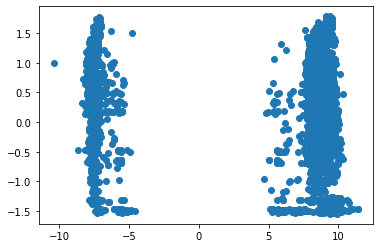

In [110]:
plt.scatter(logits,X_train_scaled['MonthlyCharges'])

In [ ]:
#plt.scatter(logits,X_train_scaled['BMI'])

In [84]:
churnData['Churn'].value_counts() #Imbalance

No     5174
Yes    1869
Name: Churn, dtype: int64

In [86]:
data_B = churnData.drop(['Churn'], axis=1)
data_B.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65


In [89]:
from sklearn.utils import resample

category_0 = data_B[data_B['SeniorCitizen'] == 0]
category_1 = data_B[data_B['SeniorCitizen'] == 1]

In [114]:
from sklearn.utils import resample
# oversampling / undersampling is only to be done on the TRAINING set
# our test set still must reflect reality!
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,SeniorCitizen,tenure,MonthlyCharges,Female,Male,No,Yes,No,Yes,No,...,996.95,997.65,997.75,998.1,999.45,999.8,999.9,No,Yes,Churn
0,-0.437749,-0.465683,-0.000474,1.025166,-1.025166,0.969579,-0.969579,-1.532186,1.532186,-0.329573,...,-0.013324,0.0,0.0,-0.013324,-0.013324,-0.013324,-0.013324,0.601271,-0.601271,No
1,-0.437749,0.885537,1.074754,1.025166,-1.025166,0.969579,-0.969579,0.652662,-0.652662,-0.329573,...,-0.013324,0.0,0.0,-0.013324,-0.013324,-0.013324,-0.013324,0.601271,-0.601271,No
2,-0.437749,-1.284605,-1.376499,-0.975452,0.975452,-1.031376,1.031376,0.652662,-0.652662,3.034225,...,-0.013324,0.0,0.0,-0.013324,-0.013324,-0.013324,-0.013324,-1.663142,1.663142,Yes
3,-0.437749,-1.161766,0.177346,-0.975452,0.975452,0.969579,-0.969579,0.652662,-0.652662,-0.329573,...,-0.013324,0.0,0.0,-0.013324,-0.013324,-0.013324,-0.013324,-1.663142,1.663142,Yes
4,-0.437749,-1.325551,-0.098524,-0.975452,0.975452,0.969579,-0.969579,-1.532186,1.532186,-0.329573,...,-0.013324,0.0,0.0,-0.013324,-0.013324,-0.013324,-0.013324,0.601271,-0.601271,No


In [ ]:
#Downsampling

In [90]:
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

In [91]:
print(category_0_undersampled.shape)
print(category_1.shape)

(1142, 15)
(1142, 15)


In [92]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

In [93]:
data_downsampled['SeniorCitizen'].value_counts()

0    1142
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
#Upsampling

In [94]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [95]:
print(category_0.shape)
print(category_1_oversampled.shape)

(5901, 15)
(5901, 15)


In [96]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [98]:
data_upsampled['SeniorCitizen'].value_counts()

0    5901
1    5901
Name: SeniorCitizen, dtype: int64

In [ ]:
#Incomplete